In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

#import lsst.ip.diffim as ipDiffim
# I linked from ip_diffim/python/lsst/ip/diffim/imageMapReduce.py into diffimTests/imageMapReduce.py
#    (or copy it)

In [2]:
import diffimTests as dit
#reload(dit)

testObj = dit.DiffimTest(varFlux2=np.repeat(620*np.sqrt(2)*2., 10),
                         n_sources=200, verbose=True, sourceFluxRange=(2000., 120000.), 
                         #psf_yvary_factor=0., psfSize=13)
                         psf_yvary_factor=0.5, psfSize=13)
res = testObj.runTest(spatialKernelOrder=2, zogyImageSpace=False)
print res

Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0.0, 0.0]
PSF y spatial-variation: -0.492672856874 0.488577279579
Variable source: 5 429.930150068 45.4111877538 0 1753.62481734
Variable source: 7 47.0281372458 83.6987374825 0 1753.62481734
Variable source: 11 41.0344890951 414.019055818 0 1753.62481734
Variable source: 3 131.083544347 80.5203306927 0 1753.62481734
Variable source: 2 177.353565847 137.867862426 0 1753.62481734
Variable source: 6 199.495824513 374.913115553 0 1753.62481734
Variable source: 0 163.630302512 214.310623839 0 1753.62481734
Variable source: 9 261.15293133 158.934365254 0 1753.62481734
Variable source: 4 313.612190791 285.197720876 0 1753.62481734
Variable source: 1 280.641774149 295.906549472 0 1753.62481734
{'Zogy': {'FP': 12, 'FN': 1, 'TP': 9}, 'ALstack': {'FP': 1, 'FN': 0, 'TP': 10}, 'SZogy': {'FP': 10, 'FN': 0, 'TP': 10}, 'ALstack_decorr': {'FP': 0, 'FN': 0, 'TP': 10}}


A&L(dec): stats(mean=0.069852419, stdev=24.277813, min=-167.28123, max=186.7206)
Zogy: stats(mean=0.0036388783702147069, stdev=24.395645296748327, min=-549.00552166777607, max=1203.8225857387883)
A&L(dec) - Zogy: stats(mean=0.0020577829043437476, stdev=2.2912082924436326, min=-286.61620082085818, max=474.41703934679884)
A&L(dec) - A&L: stats(mean=-0.022770859, stdev=6.7418923, min=-52.281235, max=46.136124)
Scorr: stats(mean=3.1655939637206722e-06, stdev=0.00025484757786572868, min=-0.0091492039407911775, max=0.017122394239486013)
Scorr_var: stats(mean=0.000253796914635069, stdev=1.2143675432286056e-06, min=0.00024826331951167843, max=0.0018069024431539842)


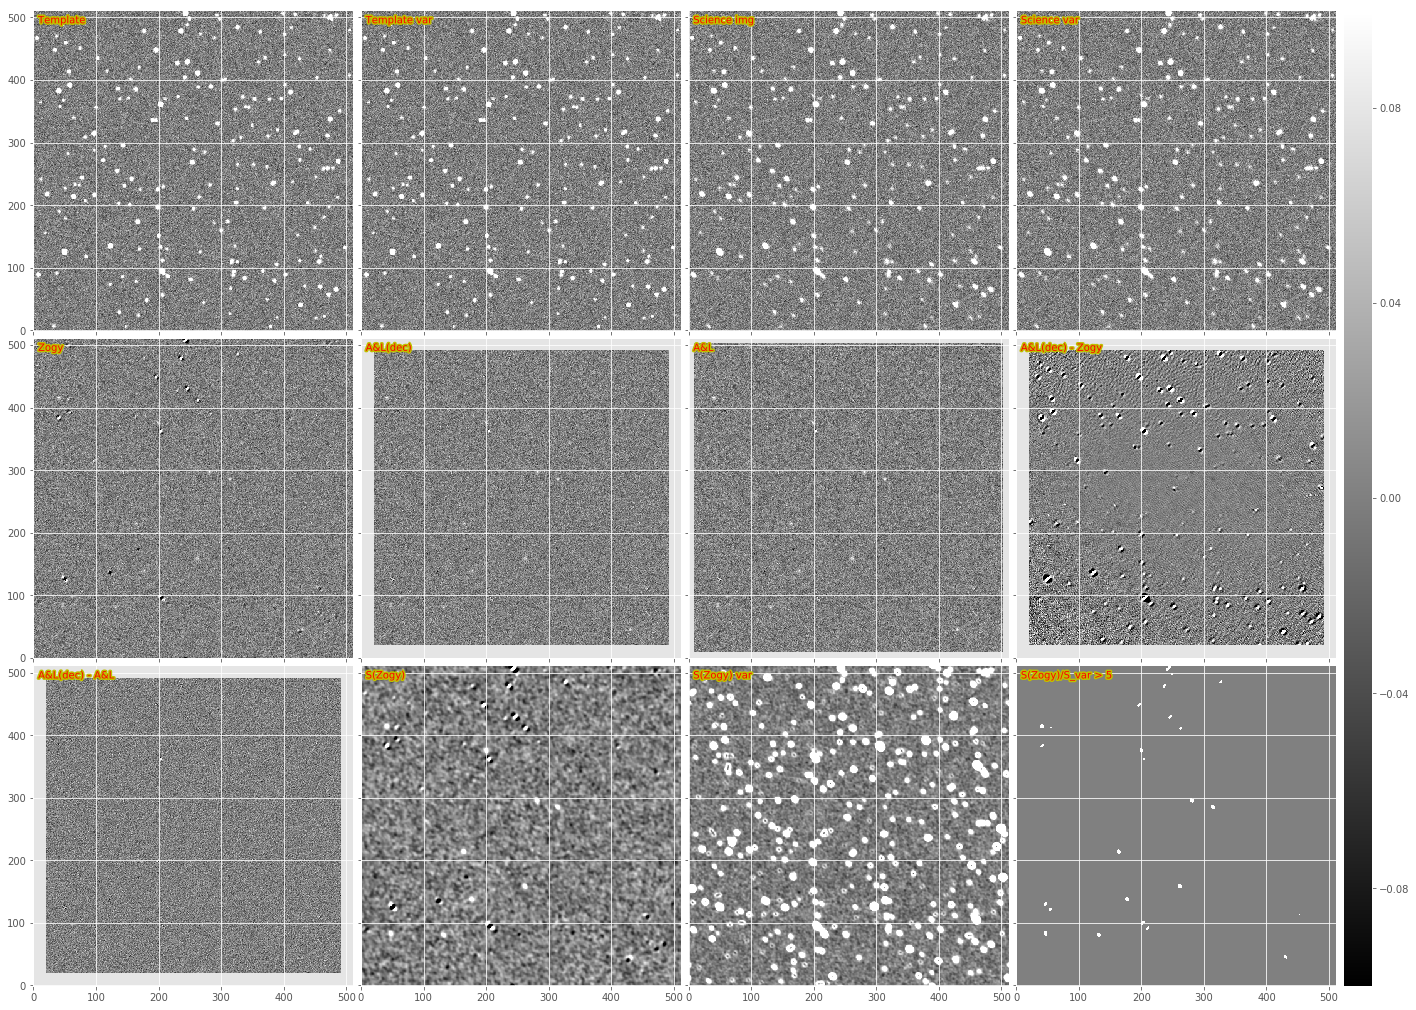

In [3]:
testObj.doPlot(imScale=6, include_Szogy=True);

Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0.0, 0.0]
PSF y spatial-variation: 0.0 0.0
Variable source: 5 429.930150068 45.4111877538 0 1753.62481734
Variable source: 7 47.0281372458 83.6987374825 0 1753.62481734
Variable source: 11 41.0344890951 414.019055818 0 1753.62481734
Variable source: 3 131.083544347 80.5203306927 0 1753.62481734
Variable source: 2 177.353565847 137.867862426 0 1753.62481734
Variable source: 6 199.495824513 374.913115553 0 1753.62481734
Variable source: 0 163.630302512 214.310623839 0 1753.62481734
Variable source: 9 261.15293133 158.934365254 0 1753.62481734
Variable source: 4 313.612190791 285.197720876 0 1753.62481734
Variable source: 1 280.641774149 295.906549472 0 1753.62481734
{'Zogy': {'FP': 0, 'FN': 0, 'TP': 10}, 'ALstack': {'FP': 2, 'FN': 0, 'TP': 10}, 'SZogy': {'FP': 1, 'FN': 0, 'TP': 10}, 'ALstack_decorr': {'FP': 0, 'FN': 0, 'TP': 10}}
A&L(dec): stats(mean=0.081038535, stdev=24.221066, min=-145.03679, max=175.03

diffimTests/diffimTests.py:106: RuntimeWarning: invalid value encountered in greater
  imagesToPlot.append((self.S_Zogy.im / self.S_Zogy.var > 5.) * 10.0)


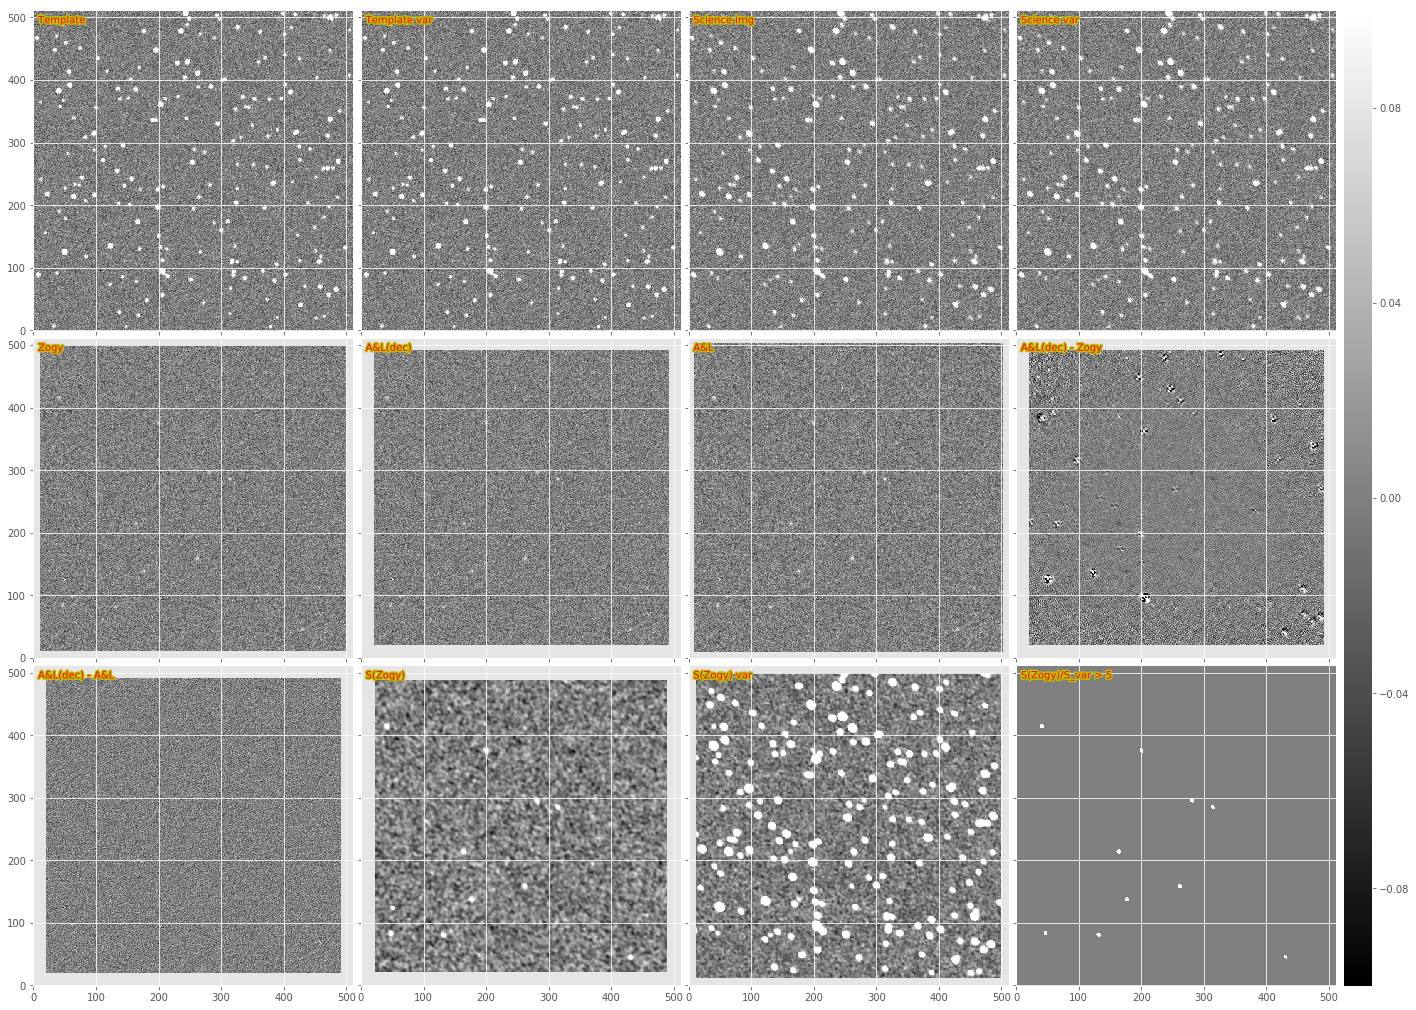

In [4]:
testObj2 = dit.DiffimTest(varFlux2=np.repeat(620*np.sqrt(2)*2., 10),
                         n_sources=200, verbose=True, sourceFluxRange=(2000., 120000.), 
                         psf_yvary_factor=0., psfSize=13)
                         #psf_yvary_factor=0.5, psfSize=13)
res2 = testObj2.runTest(spatialKernelOrder=2, zogyImageSpace=True)
print res2
testObj2.doPlot(imScale=6, include_Szogy=True);

In [5]:
import lsst.pex.config as pexConfig
import lsst.afw.image as afwImage
import lsst.afw.geom as afwGeom
import lsst.pipe.base as pipeBase

class ZogyMapperSubtask(dit.ImageMapperSubtask):
    ConfigClass = dit.ImageMapperSubtaskConfig
    _DefaultName = 'diffimTests_ZogyMapperSubtask'
    
    def __init__(self, *args, **kwargs):
        dit.ImageMapperSubtask.__init__(self, *args, **kwargs)
        
    def run(self, subExp, expandedSubExp, fullBBox, **kwargs):
        bbox = subExp.getBBox()
        center = ((bbox.getBeginX() + bbox.getEndX()) // 2., (bbox.getBeginY() + bbox.getEndY()) // 2.)
        center = afwGeom.Point2D(center[0], center[1])
        
        variablePsf2 = kwargs.get('variablePsf', None)
        sigmas = kwargs.get('sigmas', None)
        imageSpace = kwargs.get('inImageSpace', False)
        doScorr = kwargs.get('Scorr', False)
                
        # Psf and image for science img (index 2)
        subExp2 = subExp
        if variablePsf2 is None:
            psf2 = subExp.getPsf().computeImage(center).getArray()
        else:
            psf2 = variablePsf2.getImage(center.getX(), center.getY())
        psf2_orig = psf2
        subim2 = expandedSubExp.getMaskedImage()
        subarr2 = subim2.getImage().getArray()
        subvar2 = subim2.getVariance().getArray()
        if sigmas is None:
            sig2 = np.sqrt(dit.computeClippedImageStats(subvar2).mean)
        else:
            sig2 = sigmas[1]  # for testing, can use the input sigma (global value for entire exposure)
        
        # Psf and image for template img (index 1)
        template = kwargs.get('template')
        subExp1 = afwImage.ExposureF(template, expandedSubExp.getBBox())
        psf1 = template.getPsf().computeImage(center).getArray()
        psf1_orig = psf1
        subim1 = subExp1.getMaskedImage()
        subarr1 = subim1.getImage().getArray()
        subvar1 = subim1.getVariance().getArray()
        if sigmas is None:
            sig1 = np.sqrt(dit.computeClippedImageStats(subvar1).mean)
        else:
            sig1 = sigmas[0]
        
        #shape2 = subExp2.getPsf().computeShape(afwGeom.Point2D(center[0], center[1]))
        #shape1 = subExp1.getPsf().computeShape(afwGeom.Point2D(center[0], center[1]))
        #print shape2, shape1
        
        psf1b = psf1; psf2b = psf2
        if psf1.shape[0] == 41:   # it's a measured psf (hack!) Note this really helps for measured psfs.
            psf1b = psf1.copy()
            psf1b[psf1b < 0] = 0
            #psf1b[0:10,0:10] = psf1b[31:41,31:41] = 0
            psf1b[0:10,:] = psf1b[:,0:10] = psf1b[31:41,:] = psf1b[:,31:41] = 0
            psf1b /= psf1b.sum()

            psf2b = psf2.copy()
            psf2b[psf2b < 0] = 0
            psf2b[0:10,:] = psf2b[:,0:10] = psf2b[31:41,:] = psf2b[:,31:41] = 0
            psf2b /= psf2b.sum()

        # from diffimTests.diffimTests ...
        if subarr1.shape[0] < psf1.shape[0] or subarr1.shape[1] < psf1.shape[1]:
            return pipeBase.Struct(subExposure=subExp)

        tmpExp = expandedSubExp.clone()
        tmpIM = tmpExp.getMaskedImage()

        if not doScorr:
            D_zogy, var_zogy = dit.zogy.computeZogy(subarr1, subarr2, subvar1, subvar2,
                              psf1, psf2, sig1=sig1, sig2=sig2, inImageSpace=imageSpace)

            tmpIM.getImage().getArray()[:, :] = D_zogy
            tmpIM.getVariance().getArray()[:, :] = var_zogy

        else:
            S, S_var, Pd, Fd = dit.zogy.computeZogyScorr(subarr1, subarr2, subvar1, subvar2, 
                              psf1, psf2, sig1=sig1, sig2=sig2, xVarAst=0., yVarAst=0., 
                              inImageSpace=imageSpace, padSize=7)

            tmpIM.getImage().getArray()[:, :] = S
            tmpIM.getVariance().getArray()[:, :] = S_var

        # need to eventually compute diffim PSF and set it here.
        out = afwImage.ExposureF(tmpExp, subExp.getBBox())
                
        return pipeBase.Struct(subExposure=out)

class ZogyMapReduceConfig(dit.ImageMapReduceConfig):
    mapperSubtask = pexConfig.ConfigurableField(
        doc='Zogy subtask to run on each sub-image',
        target=ZogyMapperSubtask
    )

{'gridStepY': 10.0, 'gridStepX': 10.0, 'mapperSubtask': {}, 'gridSizeX': 10.0, 'gridSizeY': 10.0, 'gridCentroidsY': None, 'gridCentroidsX': None, 'reducerSubtask': {'reduceOperation': 'average'}, 'adjustGridOption': 'spacing', 'borderSizeX': 5.0, 'borderSizeY': 5.0, 'scaleByFwhm': True, 'ignoreMaskPlanes': ['INTRP', 'EDGE', 'DETECTED', 'SAT', 'CR', 'BAD', 'NO_DATA', 'DETECTED_NEGATIVE']}


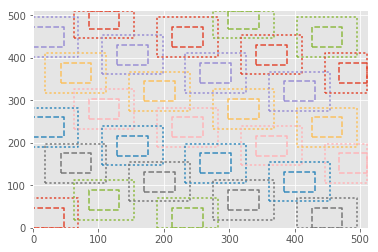

In [6]:
exposure = testObj.im2.asAfwExposure()
template = testObj.im1.asAfwExposure()

config = ZogyMapReduceConfig()
#config.gridStepX = config.gridStepY = 5
#config.gridSizeX = config.gridSizeY = 7
#config.borderSizeX = config.borderSizeY = 3
config.reducerSubtask.reduceOperation = 'average'
task = dit.ImageMapReduceTask(config=config)
print config
task._generateGrid(exposure, forceEvenSized=True)
task._plotBoxes(exposure.getBBox(), 5)

In [7]:
newExp = task.run(exposure, template=template, forceEvenSized=True).exposure #, variablePsf=testObj.variablePsf)

In [8]:
# Run with constant variance number to compare with single frame (non-gridded) ZOGY from above:
sig1 = np.sqrt(dit.computeClippedImageStats(template.getMaskedImage().getVariance().getArray()).mean)
sig2 = np.sqrt(dit.computeClippedImageStats(exposure.getMaskedImage().getVariance().getArray()).mean)
print sig1, sig2
newExpA = task.run(exposure, template=template, forceEvenSized=True, sigmas=[sig1, sig2]).exposure

17.336 17.3483


In [9]:
# Run with ZOGY in image space... ugh. Need bigger borders, for sure!

config = ZogyMapReduceConfig()
#config.gridStepX = config.gridStepY = 5
#config.gridSizeX = config.gridSizeY = 7
config.borderSizeX = config.borderSizeY = 3
config.reducerSubtask.reduceOperation = 'average'
task = dit.ImageMapReduceTask(config=config)
print config
#boxes0, boxes1 = task._generateGrid(exposure)

newExpB = task.run(exposure, template=template, sigmas=[sig1, sig2], forceEvenSized=True, inImageSpace=True).exposure

{'gridStepY': 10.0, 'gridStepX': 10.0, 'mapperSubtask': {}, 'gridSizeX': 10.0, 'gridSizeY': 10.0, 'gridCentroidsY': None, 'gridCentroidsX': None, 'reducerSubtask': {'reduceOperation': 'average'}, 'adjustGridOption': 'spacing', 'borderSizeX': 3.0, 'borderSizeY': 3.0, 'scaleByFwhm': True, 'ignoreMaskPlanes': ['INTRP', 'EDGE', 'DETECTED', 'SAT', 'CR', 'BAD', 'NO_DATA', 'DETECTED_NEGATIVE']}


diffimTests/imageMapReduce.py:268: RuntimeWarning: invalid value encountered in true_divide
  newMI.getImage().getArray()[:, :] /= wts
diffimTests/imageMapReduce.py:269: RuntimeWarning: invalid value encountered in true_divide
  newMI.getVariance().getArray()[:, :] /= wts


In [10]:
def ga(exposure):
    return exposure.getMaskedImage().getImage().getArray()
def gv(exposure):
    return exposure.getMaskedImage().getVariance().getArray()
def rb(array, width=5):  # remove border
    shape = array.shape
    return array[width:(shape[0]-width), width:(shape[1]-width)]

stats(mean=0.96455765, stdev=17.686445, min=-74.0, max=4103.0)
stats(mean=-0.0038486216, stdev=24.401585, min=-549.01385, max=1204.0416)
stats(mean=-0.0038477392, stdev=24.401579, min=-548.89667, max=1203.8203)
stats(mean=0.0046122391, stdev=24.394407, min=-535.84637, max=392.5394)
stats(mean=0.44628778, stdev=8.6115227, min=-40.657402, max=3207.4409)
stats(mean=-1.5759726562648896e-06, stdev=0.0051686920039115056, min=-371.92501547886906, max=109.38670502400872)
stats(mean=1.5224872882449467e-08, stdev=3.9693387251753709e-05, min=-371.82336142613468, max=109.38686333394524)
stats(mean=-1.8339511428966042e-06, stdev=0.0023891869727180218, min=-0.041287185195866272, max=0.04121434778212496)


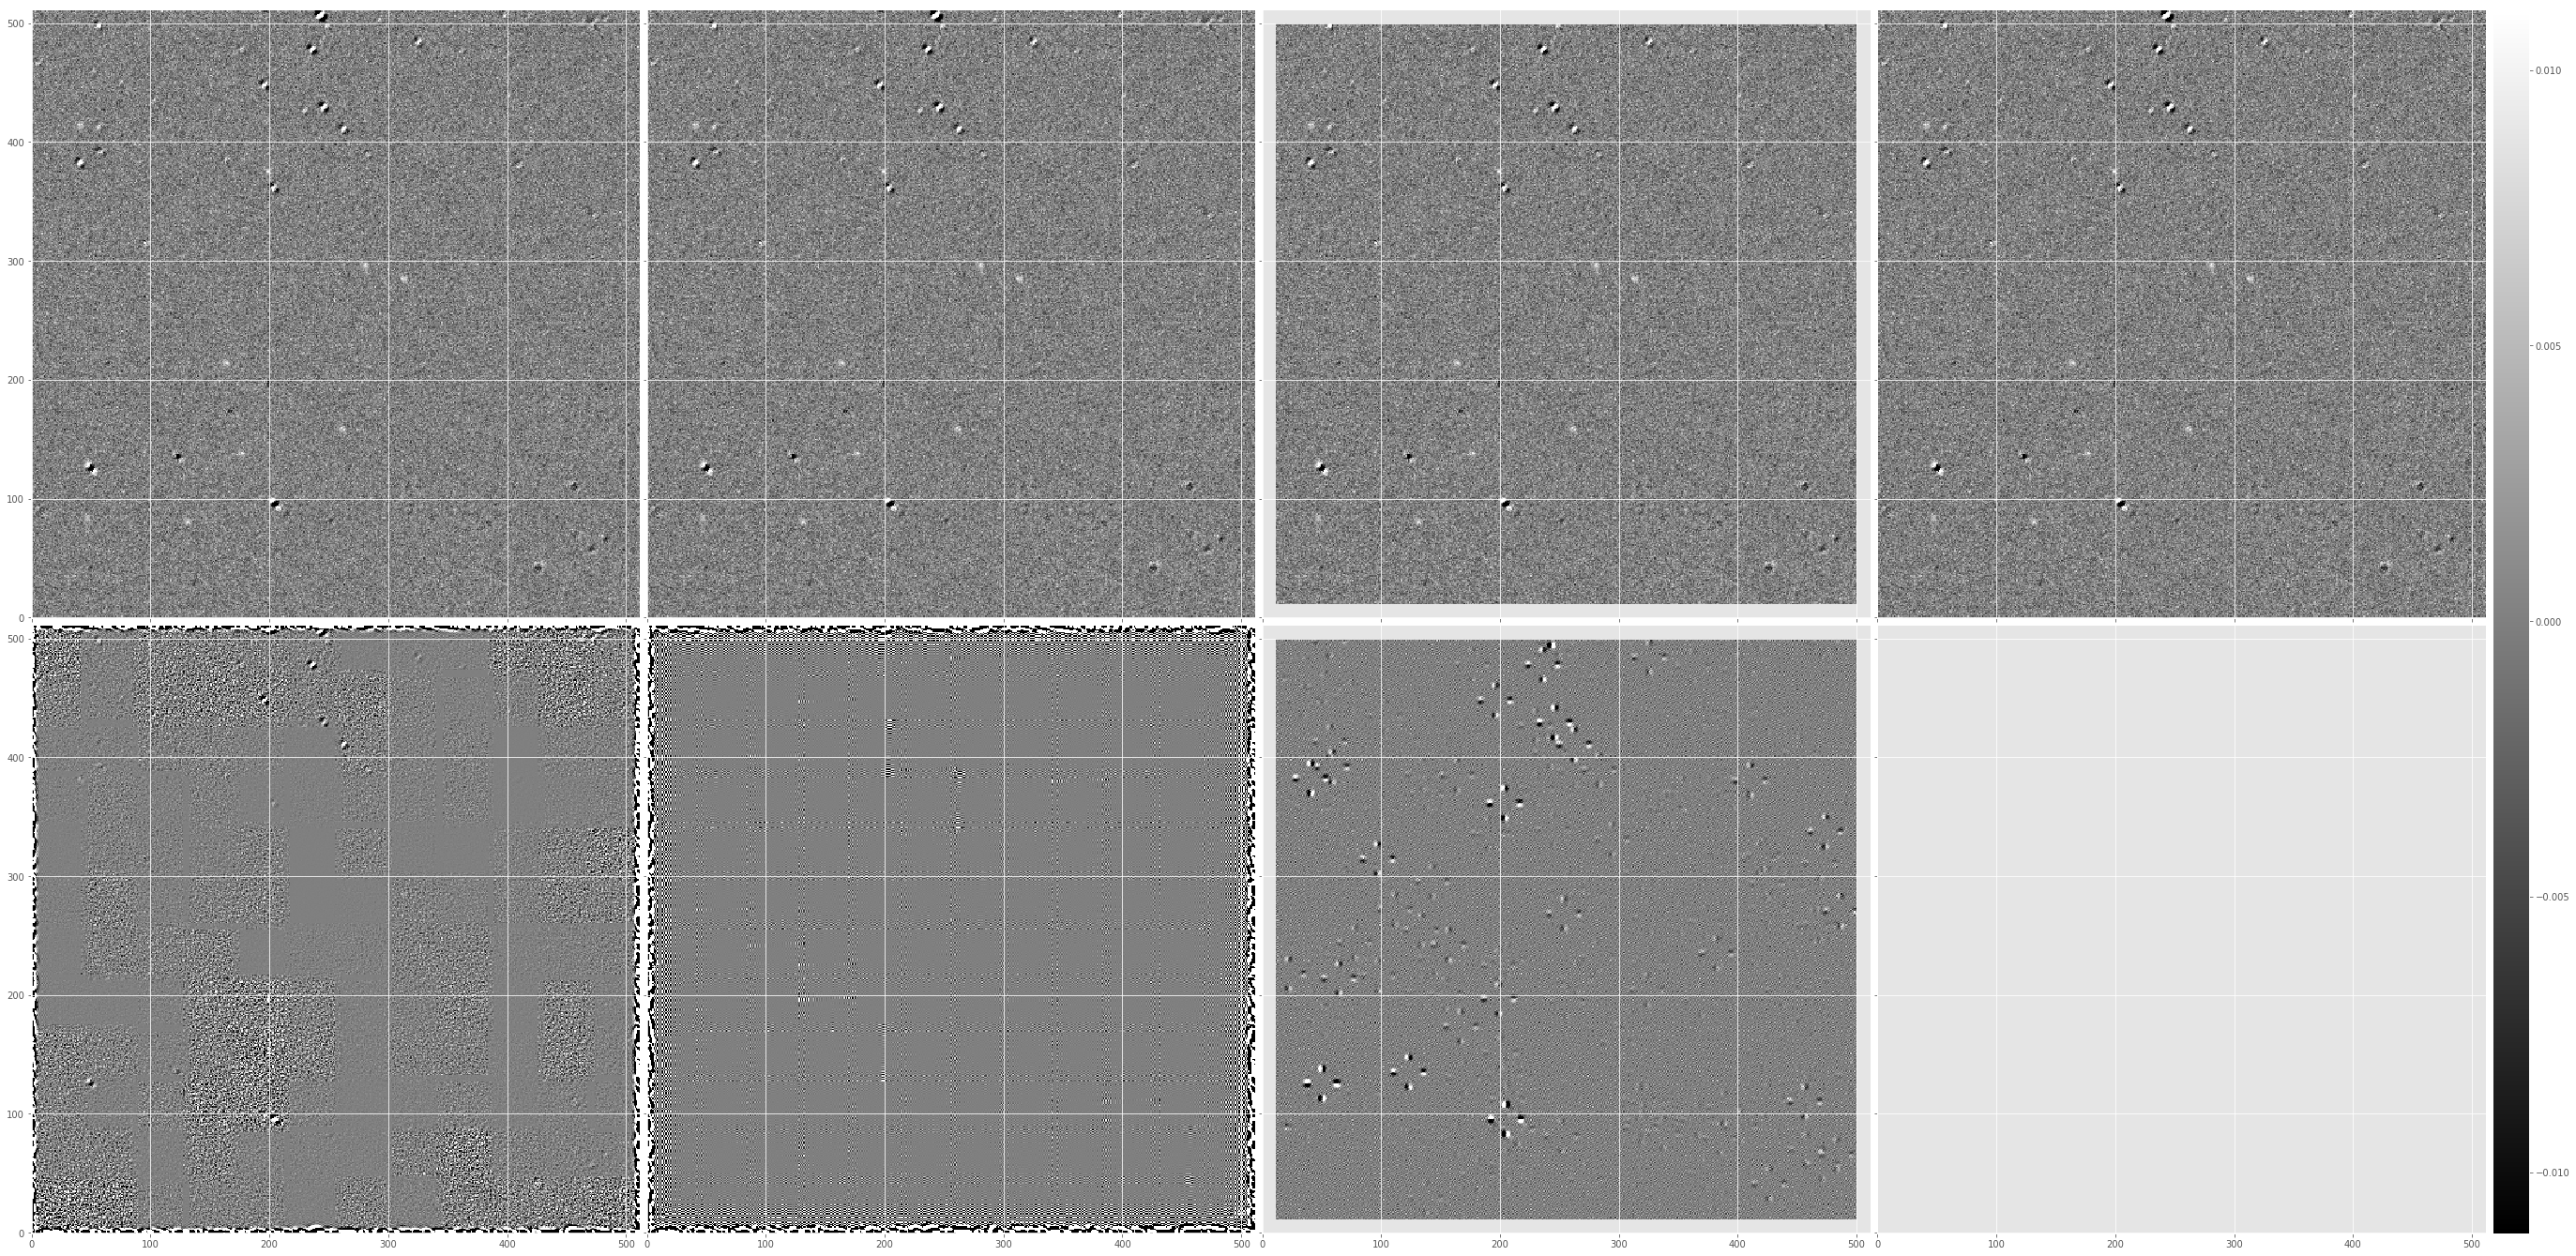

In [11]:
print dit.computeClippedImageStats(ga(exposure))
print dit.computeClippedImageStats(ga(newExp))
print dit.computeClippedImageStats(ga(newExpA))
print dit.computeClippedImageStats(ga(newExpB))
print dit.computeClippedImageStats(ga(exposure)-ga(newExp))
print dit.computeClippedImageStats(ga(newExp) - testObj.D_Zogy.im)
print dit.computeClippedImageStats(ga(newExpA) - testObj.D_Zogy.im)
print dit.computeClippedImageStats(ga(newExpB) - testObj.D_Zogy.im)
dit.plotImageGrid((ga(newExp), ga(newExpA), ga(newExpB), testObj.D_Zogy.im, ga(newExp)-testObj.D_Zogy.im,
                  ga(newExpA)-testObj.D_Zogy.im, ga(newExpB)-testObj.D_Zogy.im), imScale=12)

try with *input* variable Psf

In [ ]:
newExp = task.run(exposure, template=template, variablePsf=testObj.variablePsf).exposure

In [ ]:
print dit.computeClippedImageStats(ga(exposure))
print dit.computeClippedImageStats(ga(newExp))
print dit.computeClippedImageStats(ga(exposure)-ga(newExp))
print dit.computeClippedImageStats(rb(ga(newExp) - testObj.D_Zogy.im))
print dit.computeClippedImageStats(rb(gv(newExp) - testObj.D_Zogy.var))
dit.plotImageGrid((ga(newExp), newExp.getMaskedImage().getVariance().getArray(),
                   testObj.D_Zogy.im, ga(newExp)-testObj.D_Zogy.im, gv(newExp)-testObj.D_Zogy.var), imScale=6)

Now for S_corr

In [ ]:
# Need even bigger borders, for sure!

config = ZogyMapReduceConfig()
#config.gridStepX = config.gridStepY = 5
#config.gridSizeX = config.gridSizeY = 7
#config.borderSizeX = config.borderSizeY = 5
config.reducerSubtask.reduceOperation = 'average'
task = dit.ImageMapReduceTask(config=config)
print config
#boxes0, boxes1 = task._generateGrid(exposure)

newExp_Scorr = task.run(exposure, template=template, inImageSpace=False, variablePsf=testObj.variablePsf,
                       Scorr=True, forceEvenSized=True).exposure

In [ ]:
Sim = ga(newExp_Scorr)
Svar = gv(newExp_Scorr)
print dit.computeClippedImageStats(rb(Sim))
print dit.computeClippedImageStats(rb(Svar))
print dit.computeClippedImageStats(testObj.S_Zogy.im)
print dit.computeClippedImageStats(testObj.S_Zogy.var)
print dit.computeClippedImageStats(rb(Sim-testObj.S_Zogy.im))
dit.plotImageGrid((ga(newExp), Sim, Svar, (Sim/Svar > 5.0) * 1.0, testObj.S_Zogy.im, Sim-testObj.S_Zogy.im), imScale=6)

In [ ]:
print dit.computeClippedImageStats(Svar)
print dit.computeClippedImageStats(testObj.S_Zogy.var)
print dit.computeClippedImageStats(rb(Svar-testObj.S_Zogy.var))
dit.plotImageGrid((Svar, testObj.S_Zogy.var, testObj.S_Zogy.var-Svar), imScale=6) #, clim=(-0.03,0.3))

In [ ]:
plt.plot(Svar.flatten(), (testObj.S_Zogy.var-Svar).flatten())

In [ ]:
plt.plot(Sim.flatten(), (Sim-testObj.S_Zogy.im).flatten())
#plt.ylim(-0.002, +0.002)

In [ ]:
config = ZogyMapReduceConfig()
#config.gridStepX = config.gridStepY = 5
#config.gridSizeX = config.gridSizeY = 7
#config.borderSizeX = config.borderSizeY = 5
config.reducerSubtask.reduceOperation = 'none'
task = dit.ImageMapReduceTask(config=config)
print config
#boxes0, boxes1 = task._generateGrid(exposure)

subimgs = task.run(exposure, template=template, inImageSpace=False, variablePsf=testObj.variablePsf,
                       Scorr=True, forceEvenSized=True)

In [ ]:
subs = [res.subExposure for res in subimgs.result]
#for s in subs:
#    print dit.computeClippedImageStats(s.getMaskedImage().getImage().getArray())
dit.plotImageGrid(subs, clim=(-0.001,0.001))

In [ ]:
subs = [res.subExposure.getMaskedImage().getVariance() for res in subimgs.result]
#for s in subs:
#    print dit.computeClippedImageStats(s.getArray())
dit.plotImageGrid(subs, clim=(0.0002,0.0005))

In [ ]:
# Re-run code from reducertask.

newExp = exposure.clone()
newMI = newExp.getMaskedImage()

newMI.getImage()[:, :] = 0.
newMI.getVariance()[:, :] = 0.
weights = afwImage.ImageI(newMI.getBBox())

mapperResults = subimgs.result

for item in mapperResults:
    item = item.subExposure  # Expected named value in the pipeBase.Struct
    subExp = afwImage.ExposureF(newExp, item.getBBox())
    subMI = subExp.getMaskedImage()
    patchMI = item.getMaskedImage()
    isNotNan = ~(np.isnan(patchMI.getImage().getArray()) |
                 np.isnan(patchMI.getVariance().getArray()))
    subMI.getImage().getArray()[isNotNan] += patchMI.getImage().getArray()[isNotNan]
    subMI.getVariance().getArray()[isNotNan] += patchMI.getVariance().getArray()[isNotNan]
    wsubim = afwImage.ImageI(weights, item.getBBox())
    wsubim.getArray()[isNotNan] += 1

In [ ]:
dit.plotImageGrid((newMI.getImage(), newMI.getVariance(), weights), imScale=6)

In [ ]:
wts = weights.getArray().astype(np.float)
newMI.getImage().getArray()[:, :] /= wts
newMI.getVariance().getArray()[:, :] /= wts
dit.plotImageGrid((newMI.getImage(), newMI.getVariance(), weights), imScale=6)